In [2]:
import pandas as pd
from pathlib import Path

base = Path("data/processed")

paths = {
    "PGA": base / "PGA_Championship" / "PGA_combined_data.csv",
    "Masters": base / "The_Masters" / "Masters_combined_data.csv",
    "Open": base / "The_Open" / "Open_combined_data.csv",
    "US Open": base / "US_Open" / "US_Open_combined_data.csv",
}

dfs = []
for major_name, path in paths.items():
    df = pd.read_csv(path)
    df["major"] = major_name
    dfs.append(df)

all_majors = pd.concat(dfs, ignore_index=True)
all_majors.head()


,position,player_name,total_score,r4_score,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,...,accuracy,gir,prox_fw,prox_rgh,scrambling,great_shots,poor_shots,sg_bs,year,major
0,1,"Morikawa, Collin",-13,-6.0,2.019,0.147,0.912,0.701,1.760,3.779,...,0.696430,0.708335,29.122857,44.040675,0.800002,3.5,1.25,1.613,2020,PGA
1,T2,"Johnson, Dustin",-11,-2.0,1.704,0.340,0.865,0.370,1.575,3.279,...,0.446430,0.638890,28.898395,42.763070,0.705884,5.0,2.00,1.235,2020,PGA
2,T2,"Casey, Paul",-11,-4.0,0.226,0.521,1.806,0.726,3.053,3.279,...,0.589287,0.763888,27.112698,45.754738,0.680000,4.0,2.00,2.532,2020,PGA
3,T4,"Day, Jason",-10,-4.0,0.638,0.277,1.965,0.149,2.391,3.029,...,0.446427,0.763888,28.402870,41.549137,0.681819,2.0,1.50,2.114,2020,PGA
4,T4,"DeChambeau, Bryson",-10,-4.0,1.196,-0.328,0.333,1.828,1.833,3.029,...,0.517857,0.666665,32.521336,36.314661,0.657897,6.5,3.00,2.161,2020,PGA


In [3]:
# asegúrate de cómo se llama la columna del jugador
all_majors.columns

Index(['position', 'player_name', 'total_score', 'r4_score', 'sg_putt',
       'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'distance',
       'accuracy', 'gir', 'prox_fw', 'prox_rgh', 'scrambling', 'great_shots',
       'poor_shots', 'sg_bs', 'year', 'major'],
      dtype='object')

In [4]:
player_stats = (
    all_majors
    .groupby("player_name")
    .agg(
        n_rows=("player_name", "size"),          # total filas = total participaciones
        n_years=("year", "nunique"),
        n_majors=("major", "nunique"),
    )
    .reset_index()
    .sort_values("n_rows", ascending=False)
)

player_stats.head(20)


,player_name,n_rows,n_years,n_majors
615,"Spieth, Jordan",21,6,4
655,"Thomas, Justin",21,6,4
452,"Morikawa, Collin",21,6,4
401,"Lowry, Shane",21,6,4
119,"Conners, Corey",21,6,4
427,"McIlroy, Rory",21,6,4
84,"Cantlay, Patrick",21,6,4
567,"Schauffele, Xander",21,6,4
575,"Scott, Adam",21,6,4
601,"Smith, Cameron",21,6,4


In [5]:
player_stats = player_stats.rename(
    columns={
        "n_rows": "n_participations",
    }
)

player_stats.head(20)


,player_name,n_participations,n_years,n_majors
615,"Spieth, Jordan",21,6,4
655,"Thomas, Justin",21,6,4
452,"Morikawa, Collin",21,6,4
401,"Lowry, Shane",21,6,4
119,"Conners, Corey",21,6,4
427,"McIlroy, Rory",21,6,4
84,"Cantlay, Patrick",21,6,4
567,"Schauffele, Xander",21,6,4
575,"Scott, Adam",21,6,4
601,"Smith, Cameron",21,6,4


In [6]:
# ¿cuántos jugadores con X participaciones?
counts = (
    player_stats["n_participations"]
    .value_counts()
    .sort_index()
)

counts


n_participations
1     334
2     113
3      59
4      42
5      23
6      19
7      11
8      13
9      15
10     14
11     13
12      7
13      7
14      3
15      5
16      4
17      8
18      3
19      6
20      8
21     18
Name: count, dtype: int64

In [7]:
counts.head(20)  # primeros 20 niveles de participaciones
player_stats["n_participations"].describe()


count    725.000000
mean       4.042759
std        5.051349
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       21.000000
Name: n_participations, dtype: float64

In [8]:
players_3_plus = player_stats[player_stats["n_participations"] >= 3]
players_5_plus = player_stats[player_stats["n_participations"] >= 5]

len(player_stats), len(players_3_plus), len(players_5_plus)


(725, 278, 177)

In [9]:
players_3_plus.describe()[["n_years", "n_majors"]]

,n_years,n_majors
count,278.000000,278.000000
mean,3.888489,3.050360
std,1.466279,1.035986
min,1.000000,1.000000
25%,3.000000,2.000000
50%,4.000000,3.000000
75%,5.000000,4.000000
max,6.000000,4.000000


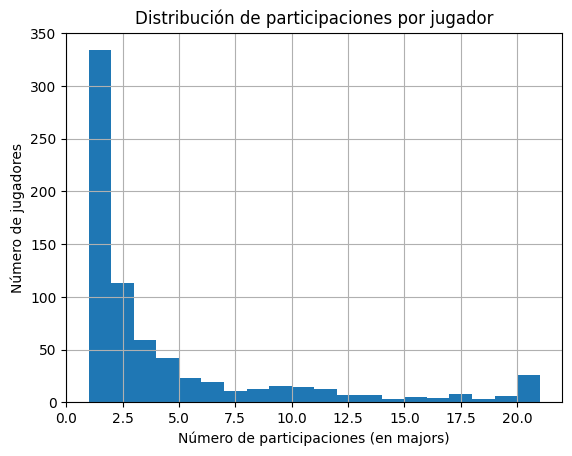

In [11]:
import matplotlib.pyplot as plt

# histograma de participaciones
plt.figure()
player_stats["n_participations"].hist(bins=20)
plt.xlabel("Número de participaciones (en majors)")
plt.ylabel("Número de jugadores")
plt.title("Distribución de participaciones por jugador")
plt.show()


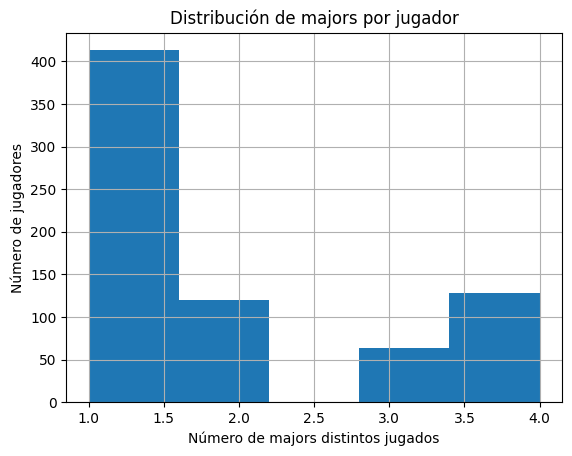

In [12]:
plt.figure()
player_stats["n_majors"].hist(bins=5)
plt.xlabel("Número de majors distintos jugados")
plt.ylabel("Número de jugadores")
plt.title("Distribución de majors por jugador")
plt.show()

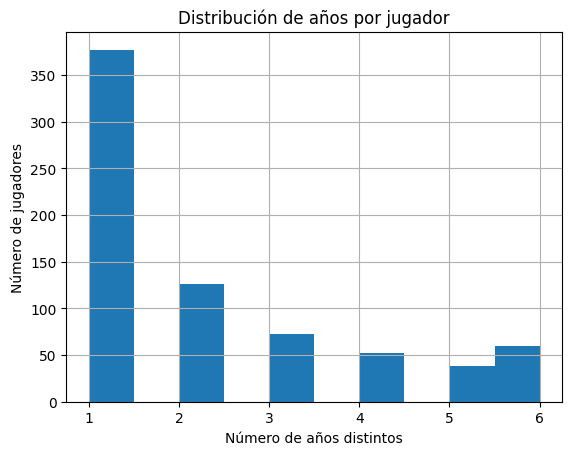

In [13]:
plt.figure()
player_stats["n_years"].hist(bins=10)
plt.xlabel("Número de años distintos")
plt.ylabel("Número de jugadores")
plt.title("Distribución de años por jugador")
plt.show()


In [14]:
panel_candidates = player_stats[
    (player_stats["n_participations"] >= 4)
    & (player_stats["n_years"] >= 3)
]

panel_candidates.sort_values("n_participations", ascending=False).head(20)
len(panel_candidates)


195